<a href="https://colab.research.google.com/github/veronikawilliams1/UG_course/blob/master/Plot2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy as sc
from scipy import fftpack, misc, interpolate
from scipy import special as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as tri
import matplotlib.image as mim
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.tri as tri
from scipy.optimize import least_squares

#Считываем таблицу с данными из файла Data.txt


In [ ]:
way_to_data = "/Data.txt"   # Экспериментальные данные

In [ ]:
Data = pd.read_table(way_to_data, sep = ' ', comment = '%') # Считывание данных
Data

,p,t,dp,dt,q_instr,q_round,q_sist
0,110.0,354.0,0.1,0.05,0.033333,0.028868,0.044096
1,109.8,349.0,0.1,0.05,0.033333,0.028868,0.044096
2,109.0,344.0,0.1,0.05,0.033333,0.028868,0.044096
3,108.4,339.0,0.1,0.05,0.033333,0.028868,0.044096
4,107.8,334.0,0.1,0.05,0.033333,0.028868,0.044096
5,107.2,329.0,0.1,0.05,0.033333,0.028868,0.044096
6,107.2,324.0,0.1,0.05,0.033333,0.028868,0.044096
7,107.0,319.0,0.1,0.05,0.033333,0.028868,0.044096


# Оценка погрешности + определение коэффициэнтов уравнения сглаживающей прямой

In [ ]:
X = Data.iloc[:,1]
Y = Data.iloc[:,0]
dX = Data.iloc[:,3]
dY = Data.iloc[:,2]

Delta = np.sum((X/dY)**2)*np.sum((1/dY)**2) - np.sum((X/dY**2))**2
Delta_a = np.sum(X*Y/dY**2)*np.sum((1/dY)**2) - np.sum((X/dY**2)) * np.sum((Y/dY**2))
Delta_b = np.sum(X**2/dY**2)*np.sum(Y/dY**2) - np.sum((X/dY**2)) * np.sum((X*Y/dY**2))

a = Delta_a/Delta
b = Delta_b/Delta
S_a = np.sum((1/dY)**2)/Delta
S_b = np.sum(X*2/dY**2)/Delta

n1 = 4
n2 = 3
# Коэффициэнты уравнения прямой
print("k: " + str(round(a,n1))+ ' +- ' + str(round(S_a,n1)))
print("b: " + str(round(b,n2)) + ' +- ' + str(round(S_b,n2)))

k: 0.0952 +- 0.0
b: 76.252 +- 0.006


# Построение графика

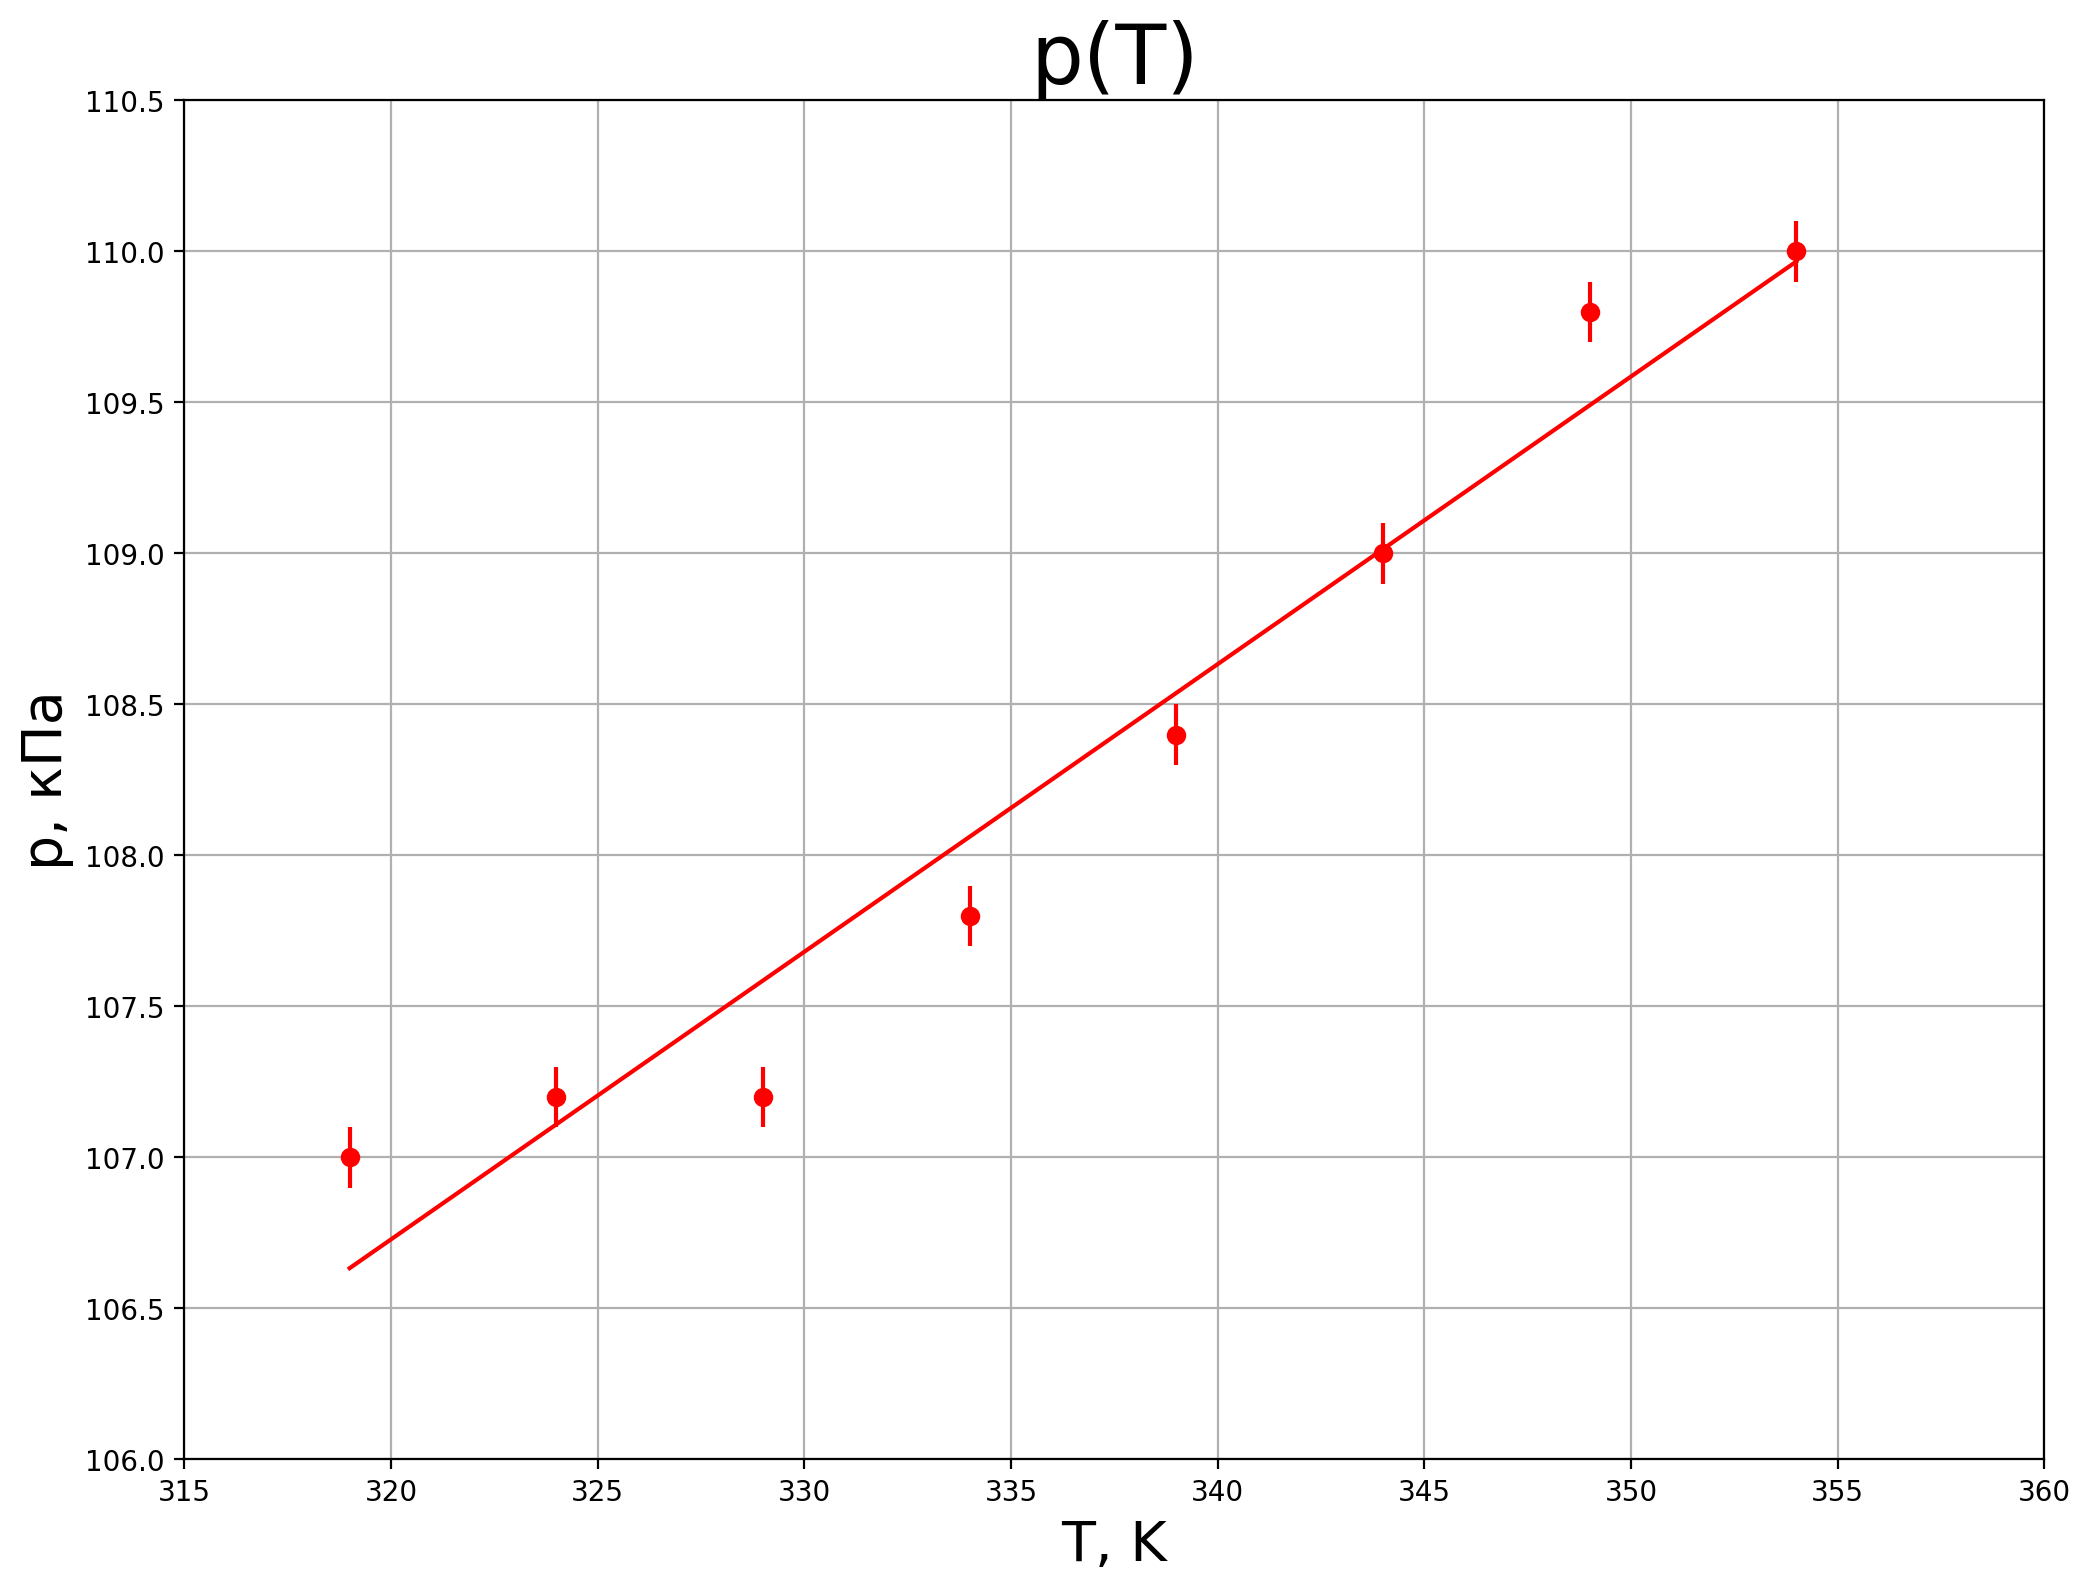

In [ ]:
fig = plt.figure(figsize=(12, 9), dpi=200)

ax = fig.add_subplot()
ax.errorbar(X, Y,  xerr=dX, yerr=dY,fmt = 'ro')
ax.plot([X[0],X[len(Y)-1]*1.0],[a*X[0]+b,a*X[len(Y)-1]*1.0+b],'r-')

ax.set_xlim(315,360)
ax.set_ylim(106,110.5)
ax.set_xlabel('T, K', fontsize = 20)
ax.set_ylabel('p, кПа', fontsize = 20)
ax.set_title('p(T)', fontsize=30)

plt.grid(True)